**Procesamiento de datos**

Cargar el dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dft = pd.read_excel('/content/práctica_solo seguridad.xlsx')
print(dft.head)

<bound method NDFrame.head of      ano  Población total  Tasa de homicidios  homicidios  \
0   2008        2291378.0           45.605745        1045   
1   2009        2317336.0           94.332458        2186   
2   2010        2343049.0           86.297811        2022   
3   2011        2368282.0           69.712982        1651   
4   2012        2393011.0           52.110082        1248   
5   2013        2417325.0           38.306806         927   
6   2014        2441123.0           26.995772         659   
7   2015        2464322.0           20.127240         496   
8   2016        2486723.0           21.876180         544   
9   2017        2508452.0           23.201560         582   
10  2018        2529403.0           25.065203         635   
11  2019        2549537.0           23.219902         593   

    Tasa de hurto personas  Total hurto a personas  Tasa de feminicidios  \
0                91.255131                    2091                   NaN   
1                74.1368

Limpieza de datos a partir de la eliminación de duplicados y gestión de valores nan o vacíos imputándolos por la media.

In [ ]:
dft = dft.fillna(dft.mean(numeric_only=True))
print(dft.head)
print(dft.columns)


<bound method NDFrame.head of      ano  Población total  Tasa de homicidios  homicidios  \
0   2008        2291378.0           45.605745        1045   
1   2009        2317336.0           94.332458        2186   
2   2010        2343049.0           86.297811        2022   
3   2011        2368282.0           69.712982        1651   
4   2012        2393011.0           52.110082        1248   
5   2013        2417325.0           38.306806         927   
6   2014        2441123.0           26.995772         659   
7   2015        2464322.0           20.127240         496   
8   2016        2486723.0           21.876180         544   
9   2017        2508452.0           23.201560         582   
10  2018        2529403.0           25.065203         635   
11  2019        2549537.0           23.219902         593   

    Tasa de hurto personas  Total hurto a personas  Tasa de feminicidios  \
0                91.255131                    2091              2.697076   
1                74.1368

**Análisis exploratorio**


Verificación comportamiento de variables de acuerdo a agrupación por categorías gráfica de series temporales

primero se crean los grupos

In [ ]:
import matplotlib.pyplot as plt

# Agrupaciones de indicadores con nombres exactos
Violencia_Letal = dft[['Tasa de homicidios', 'homicidios', 'Tasa de muertes violentas',
                       'Muertes violentas', 'suicidios']]

Violencia_No_Letal = dft[['Casos de violencia interpersonal', 'Número de extorsiones presentadas',
                          'Total riñas presentadas']]

Violencia_Genero_Mujeres = dft[['Tasa de feminicidios', 'Total feminicidios',
                                'Delitos sexuales contra mujeres', 'Violencia intrafamiliar contra mujeres']]

Violencia_Genero_Hombres = dft[['Violencia intrafamiliar contra hombres', 'Delitos sexuales a hombres']]

Violencia_Genero_No_Espec = dft[['Casos de violencia intrafamiliar', 'Delitos sexuaeles']]

Violencia_NNA = dft[['Vulneración de derechos a menores', 'Porcentaje de vulneración de derechos a menores',
                     'Delitos sexuales a menores de 5 años', 'Número de maltrato a menores',
                     'Casos de maltrato entre pareja', 'Maltrato entre familiares',
                     'Homicidios en adolescentes', 'Homicidios en jóvenes', 'Homicidios en menores']]

Delitos_Seguridad = dft[['Total hurto a personas', 'Casos de secuestro']]

Armas_Control = dft[['Número de armas de fuego incautadas', 'Homicidios por arma blanca',
                     'Homicidios por arma de fuego']]

Homicidios_Demografia = dft[['Tasa de homicidios mujeres', 'Numero de homicidios mujeres',
                             'Número de homicidios hombres',
                             'Homicidios en adolescentes', 'Homicidios en jóvenes', 'Homicidios en menores']]


**Series de tiempo**

Luego se grafican

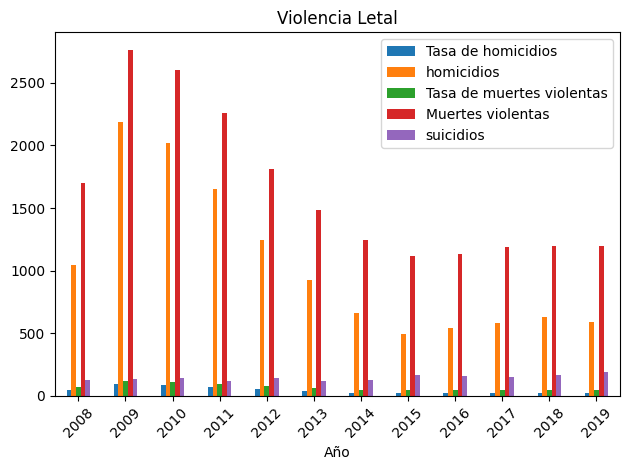

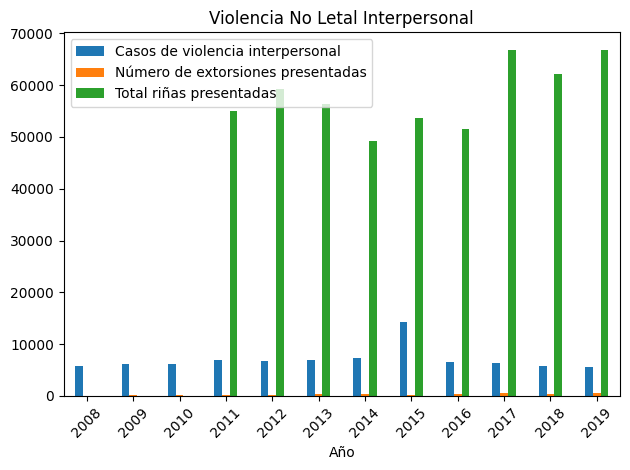

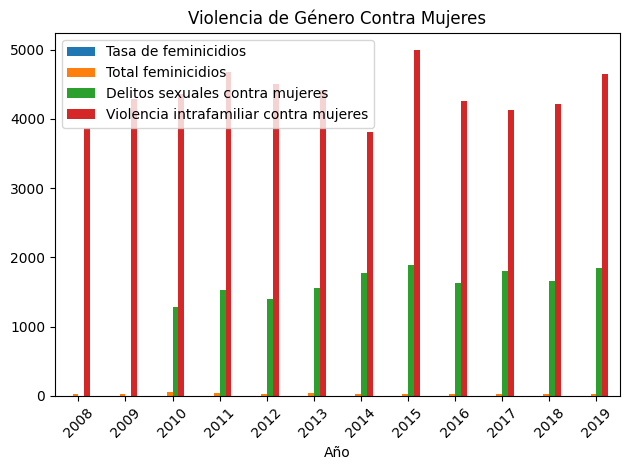

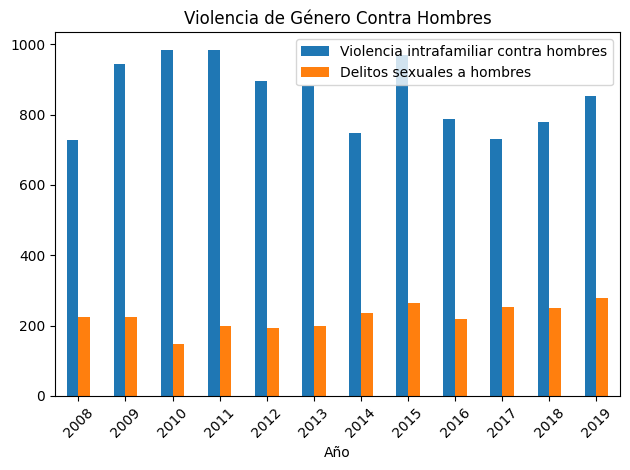

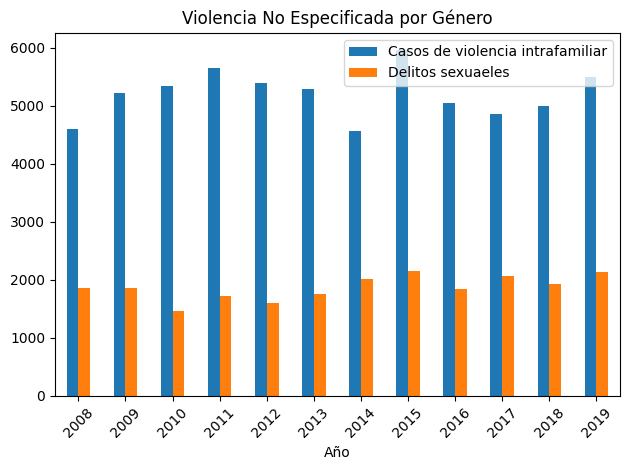

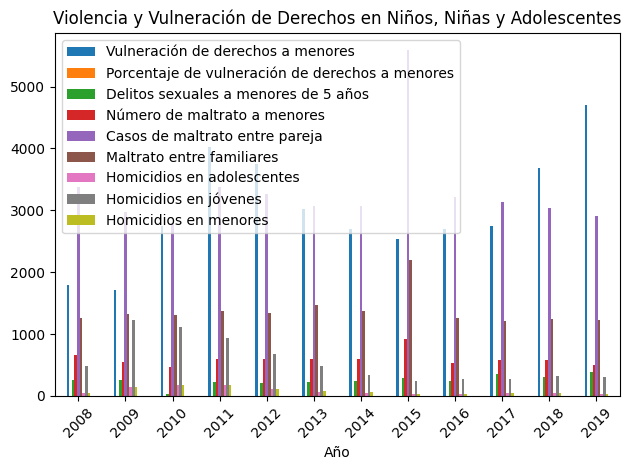

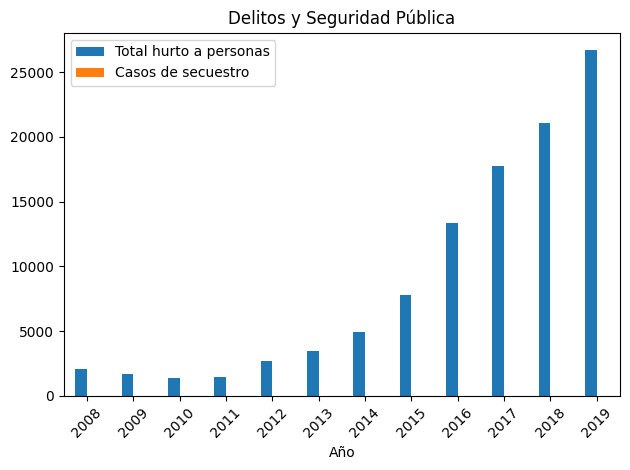

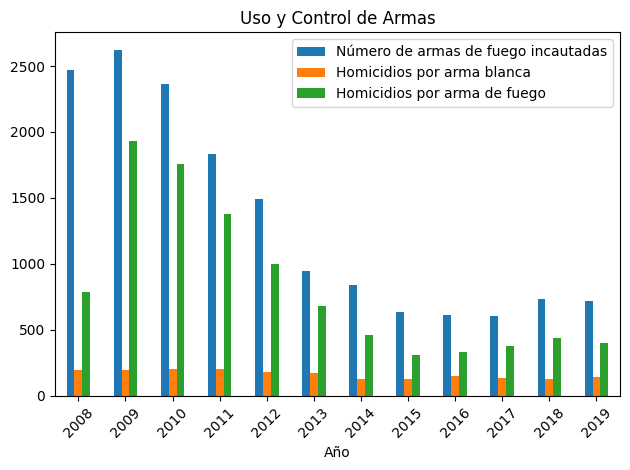

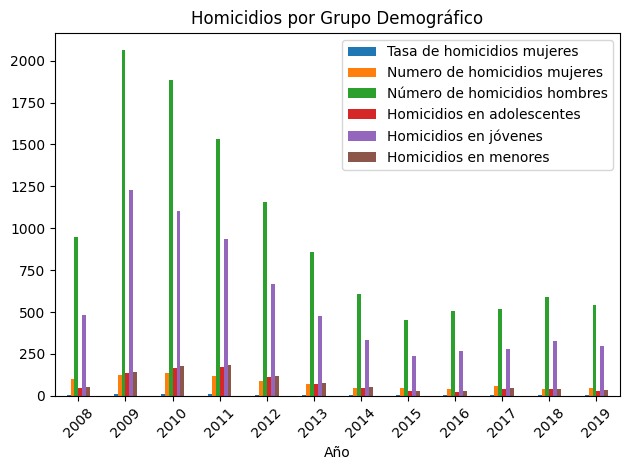

In [ ]:
# Función para graficar
def crear_grafico_grupal(dataframe, titulo):
    años = list(range(2008, 2020))  # Años del 2008 al 2019
    dataframe.index = años
    dataframe.plot(kind='bar', title=titulo)
    plt.xlabel('Año')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Crear los gráficos
crear_grafico_grupal(Violencia_Letal, 'Violencia Letal')
crear_grafico_grupal(Violencia_No_Letal, 'Violencia No Letal Interpersonal')

crear_grafico_grupal(Violencia_Genero_Mujeres, 'Violencia de Género Contra Mujeres')
crear_grafico_grupal(Violencia_Genero_Hombres, 'Violencia de Género Contra Hombres')
crear_grafico_grupal(Violencia_Genero_No_Espec, 'Violencia No Especificada por Género')

crear_grafico_grupal(Violencia_NNA, 'Violencia y Vulneración de Derechos en Niños, Niñas y Adolescentes')

crear_grafico_grupal(Delitos_Seguridad, 'Delitos y Seguridad Pública')
crear_grafico_grupal(Armas_Control, 'Uso y Control de Armas')

crear_grafico_grupal(Homicidios_Demografia, 'Homicidios por Grupo Demográfico')



Ejercicio similar pero enfocado al comportamiento de las variables que aluden al accionar estatal



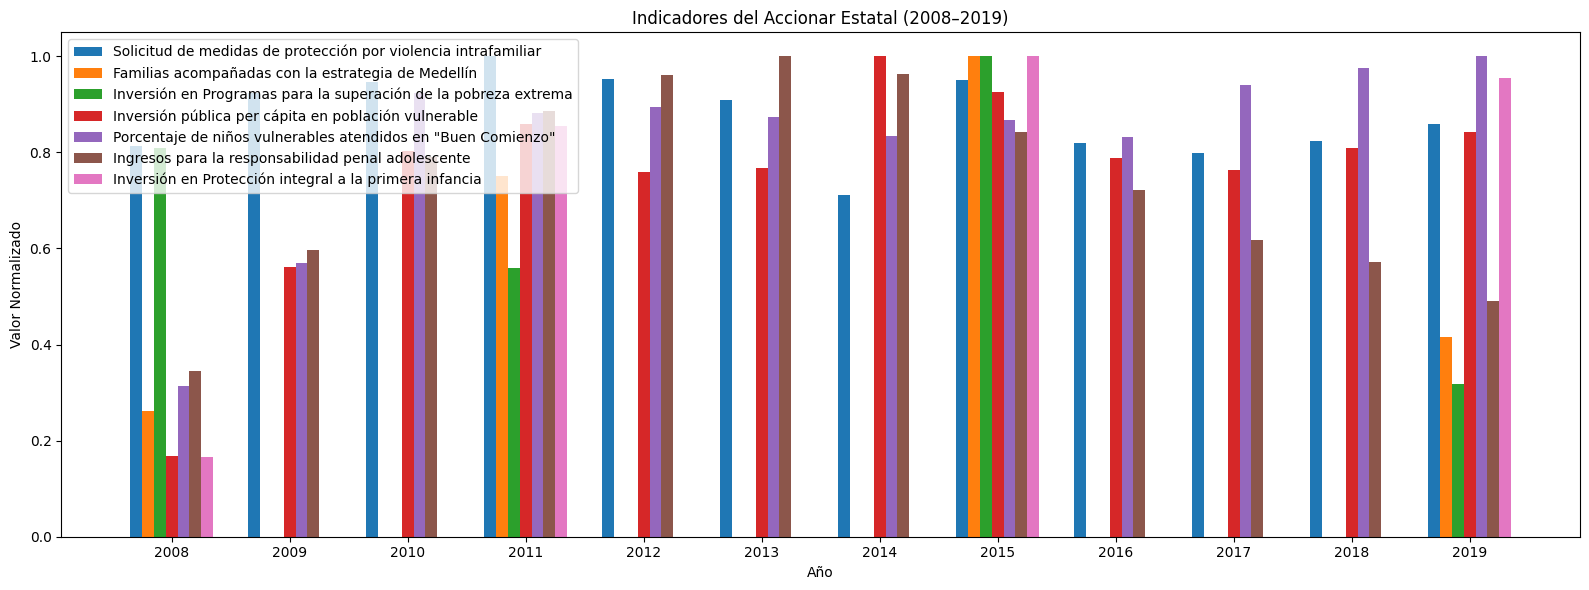

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurar años como índice
dft.index = range(2008, 2008 + len(dft))

# Variables a graficar
variables = [
    'Solicitud de medidas de protección por violencia intrafamiliar',
    'Familias acompañadas con la estrategia de Medellín',
    'Inversión en Programas para la superación de la pobreza extrema',
    'Inversión pública per cápita en población vulnerable',
    'Porcentaje de niños vulnerables atendidos en "Buen Comienzo"',
    'Ingresos para la responsabilidad penal adolescente',
    'Inversión en Protección integral a la primera infancia'
]

# Asegurar que no hay valores nulos
dft_ind = dft[variables].fillna(0)

# Normalizar
dft_normalized = dft_ind / dft_ind.max().replace(0, 1)

# Plot
bar_width = 0.1
x = np.arange(len(dft_normalized.index))
fig, ax = plt.subplots(figsize=(16, 6))

for i, var in enumerate(variables):
    ax.bar(x + i * bar_width, dft_normalized[var], width=bar_width, label=var)

ax.set_xticks(x + bar_width * (len(variables) - 1) / 2)
ax.set_xticklabels(dft_normalized.index)
ax.set_xlabel('Año')
ax.set_ylabel('Valor Normalizado')
ax.set_title('Indicadores del Accionar Estatal (2008–2019)')
ax.legend(loc='best')
plt.tight_layout()
plt.show()





**Heat map**

Mapa de calor para identificar correlaciones entre variables

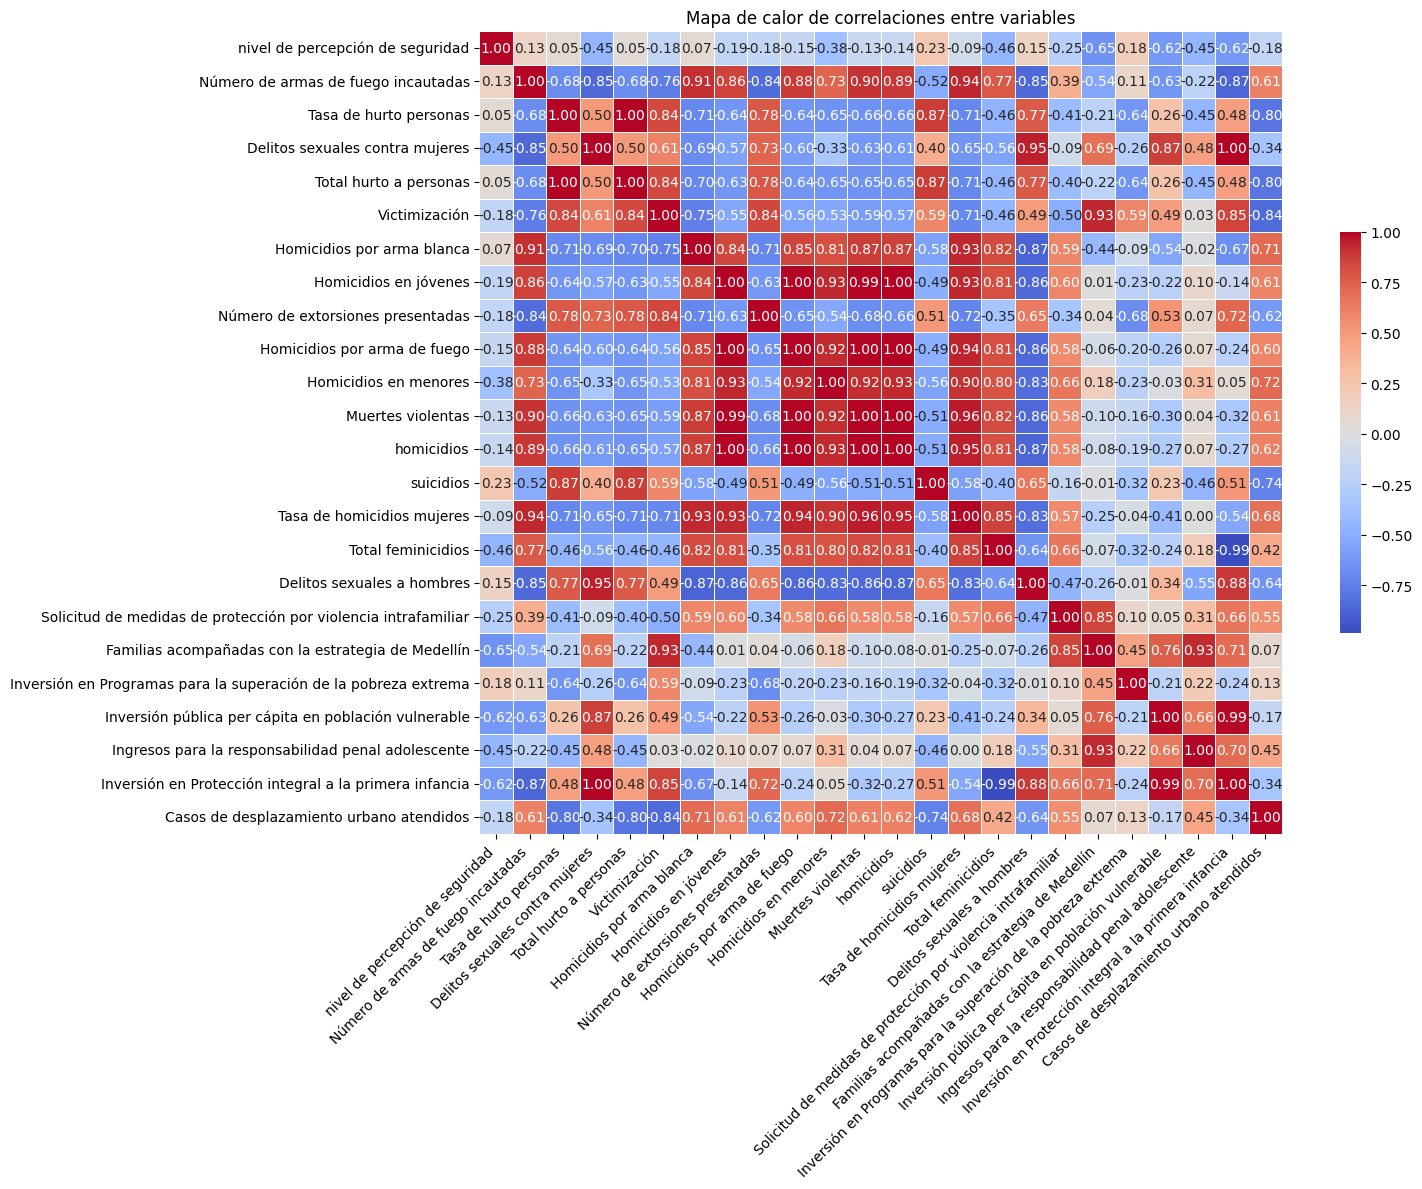

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Cargar la base de datos
file_path = "/content/practica solo seguridad.xlsx"
df = pd.read_excel(file_path)

# 🧹 Limpiar nombres de columnas para evitar errores por espacios o caracteres especiales
df.columns = df.columns.str.strip()

# 🎯 Definir variables dependientes e independientes
variables_dependientes = [
    'nivel de percepción de seguridad', 'Número de armas de fuego incautadas', 'Tasa de hurto personas',
    'Delitos sexuales a menores de 5 a 9 años', 'Delitos sexuales contra mujeres', 'Total hurto a personas',
    'Victimización', 'Delitos sexuales', 'Homicidios por arma blanca', 'Homicidios en jóvenes',
    'Número de extorsiones presentadas', 'Homicidios por arma de fuego', 'Homicidios en menores',
    'Muertes violentas', 'homicidios', 'suicidios', 'Tasa de homicidios mujeres',
    'Total feminicidios', 'Delitos sexuales a hombres', 'casos de violencia intrafamiliar'
]

variables_independientes = [
    'Solicitud de medidas de protección por violencia intrafamiliar',
    'Familias acompañadas con la estrategia de Medellín',
    'Inversión en Programas para la superación de la pobreza extrema',
    'Inversión pública per cápita en población vulnerable',
    'Porcentaje de niños vulnerables atendidos en Buen Comienzo',
    'Ingresos para la responsabilidad penal adolescente',
    'nivel de percepción de seguridad',  # repetida, podrías eliminarla si ya está en dependientes
    'Inversión en Protección integral a la primera infancia',
    'Casos de desplazamiento urbano atendidos'
]

# Filtrar solo las columnas que existen en la base de datos
variables_existentes = [col for col in variables_dependientes + variables_independientes if col in df.columns]
df_filtered = df[variables_existentes].copy()

# Ver si hay columnas duplicadas y eliminarlas
df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated()]

# Eliminar columnas constantes (sin variabilidad)
constant_cols = [col for col in df_filtered.columns if df_filtered[col].nunique() == 1]
if constant_cols:
    print(f"Columnas constantes eliminadas: {constant_cols}")
    df_filtered.drop(columns=constant_cols, inplace=True)

# Mapa de calor de correlaciones
plt.figure(figsize=(16, 12))  # Ajusta el tamaño según necesidad
sns.heatmap(
    df_filtered.corr(method='pearson'),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.title("Mapa de calor de correlaciones entre variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Modelamiento y análisis**

**Random Forest**

Random forest aplicado a todas las variables

/tmp/ipython-input-5-3851897589.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_vars["Variable"], x=top_vars["Importancia"], palette="viridis")


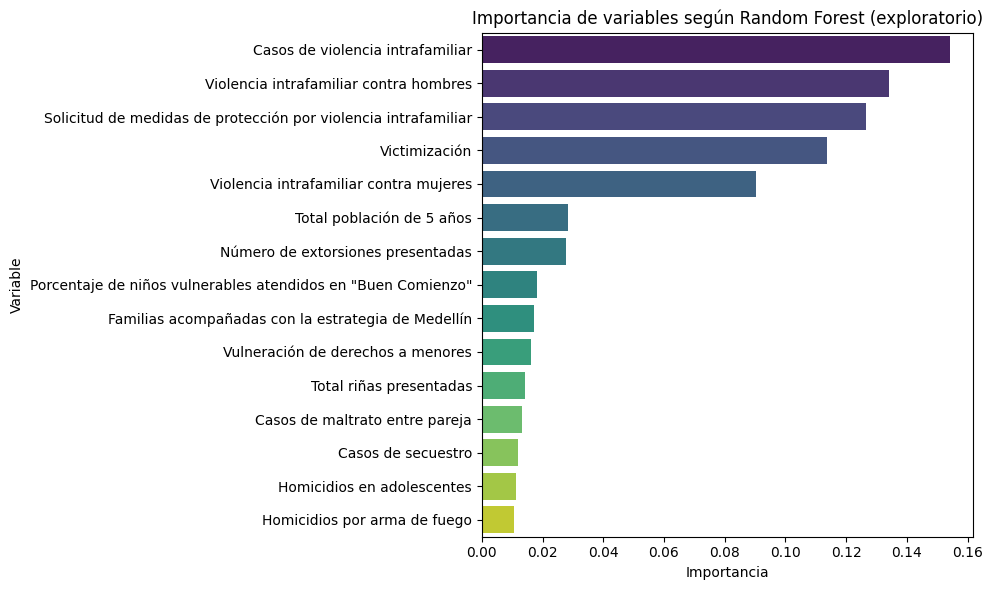

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparar datos
X = dft.drop(columns="ano")
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Random Forest sin objetivo explícito: generamos un índice sintético como promedio
synthetic_index = X_scaled.mean(axis=1)
features = pd.DataFrame(X_imputed, columns=X.columns)

rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(features, synthetic_index)

# Importancia de variables
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Variable': features.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar top 15
top_vars = importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_vars["Variable"], x=top_vars["Importancia"], palette="viridis")
plt.title("Importancia de variables según Random Forest (exploratorio)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Prueba de ejercicio de random forest para evidenciar el peso de las variables independientes sobre las dependientes

Tabla de Importancia Promedio de Variables:
                                            Variable  Importancia
0  Solicitud de medidas de protección por violenc...     0.309733
1  Porcentaje de niños vulnerables atendidos en "...     0.166280
2  Inversión pública per cápita en población vuln...     0.135450
3  Ingresos para la responsabilidad penal adolesc...     0.121632
4                   nivel de percepción de seguridad     0.100127
5  Inversión en Protección integral a la primera ...     0.072647
6  Inversión en Programas para la superación de l...     0.053079
7  Familias acompañadas con la estrategia de Mede...     0.041052


<ipython-input-11-9d291e9a3184>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importancia_df, palette="viridis")


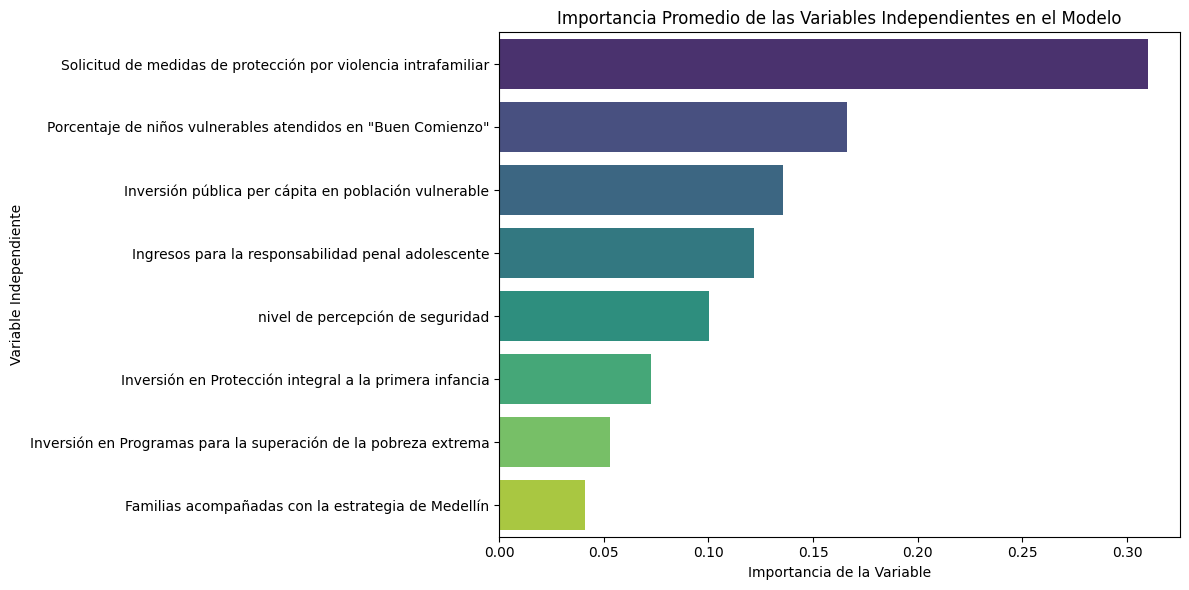

R² promedio: 0.8550


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copia de seguridad del DataFrame
df = dft.copy()

# Variables independientes
variables_independientes = [
    'Solicitud de medidas de protección por violencia intrafamiliar',
    'Familias acompañadas con la estrategia de Medellín',
    'Inversión en Programas para la superación de la pobreza extrema',
    'Inversión pública per cápita en población vulnerable',
    'Porcentaje de niños vulnerables atendidos en "Buen Comienzo"',
    'Ingresos para la responsabilidad penal adolescente',
    'nivel de percepción de seguridad',
    'Inversión en Protección integral a la primera infancia',

]

# Filtrar solo columnas numéricas
df = df.select_dtypes(include='number')

# Variables objetivo = todas menos las independientes
variables_objetivo = [col for col in df.columns if col not in variables_independientes]

# Imputador para manejar NaNs
imputador = SimpleImputer(strategy='median')

# DataFrame para guardar importancias
importancia_total = pd.DataFrame(index=variables_independientes)

# Lista para almacenar R²
r2_list = []

for objetivo in variables_objetivo:
    try:
        columnas = variables_independientes + [objetivo]
        df_modelo = df[columnas]
        df_modelo_imputado = pd.DataFrame(imputador.fit_transform(df_modelo), columns=columnas)

        if df_modelo_imputado.shape[0] < 10:
            continue

        X = df_modelo_imputado[variables_independientes]
        y = df_modelo_imputado[objetivo]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # Guardar importancias y R²
        importancia_total[objetivo] = model.feature_importances_
        y_pred = model.predict(X)
        r2_list.append(r2_score(y, y_pred))
    except Exception as e:
        print(f"⚠️ Falló la variable {objetivo}: {e}")
        continue

# Calcular importancia promedio
importancia_promedio = importancia_total.mean(axis=1).sort_values(ascending=False)
importancia_df = importancia_promedio.reset_index()
importancia_df.columns = ["Variable", "Importancia"]

# Mostrar tabla
print("Tabla de Importancia Promedio de Variables:")
print(importancia_df)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x="Importancia", y="Variable", data=importancia_df, palette="viridis")
plt.title("Importancia Promedio de las Variables Independientes en el Modelo")
plt.xlabel("Importancia de la Variable")
plt.ylabel("Variable Independiente")
plt.tight_layout()
plt.show()

# Mostrar R² promedio del conjunto
print(f"R² promedio: {sum(r2_list) / len(r2_list):.4f}" if r2_list else "⚠️ No se pudo calcular el R² promedio.")


**PCA**

Prueba de PCA traspuesto para identificar las principales agrupaciones anuales

Varianza explicada por PC1: 45.03%
Varianza explicada por PC2: 19.89%


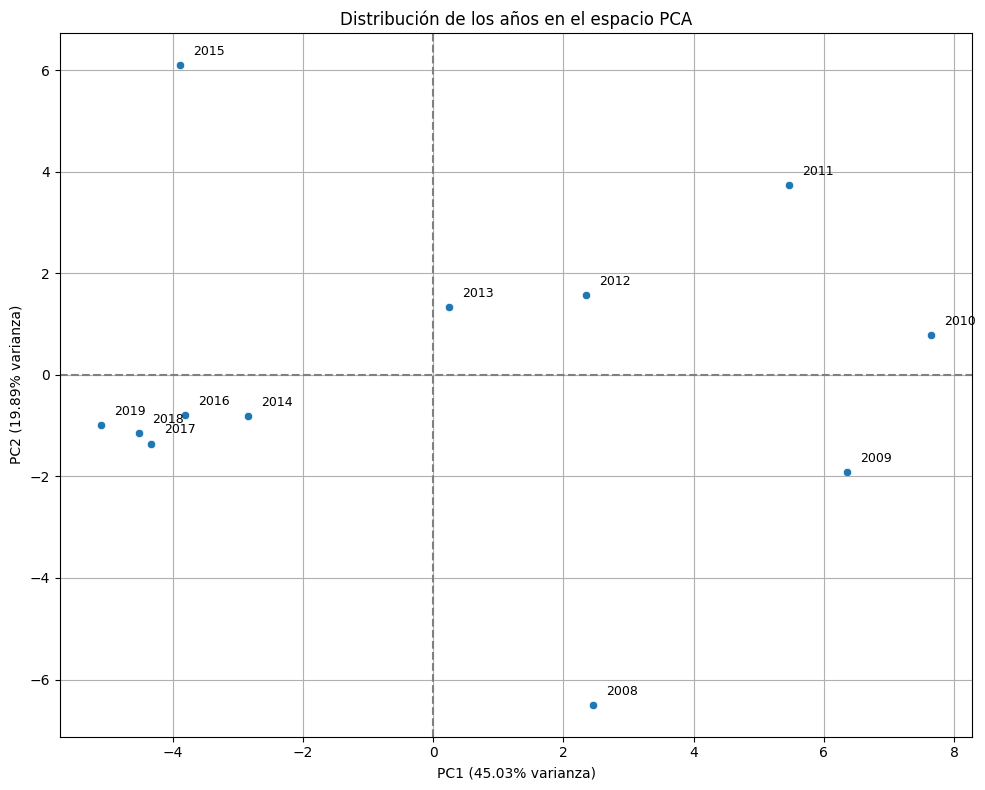


Variables más influyentes en PC1 (positivas):
                                   PC1       PC2
Tasa de homicidios mujeres    0.217402 -0.022491
Numero de homicidios mujeres  0.216996 -0.015355
Tasa de muertes violentas     0.214355 -0.014043
Muertes violentas             0.213802 -0.005915
Tasa de homicidios            0.213696 -0.006097
homicidios                    0.213055 -0.001526
Número de homicidios hombres  0.212111 -0.000660
Homicidios por arma de fuego  0.211260  0.000992
Homicidios en jóvenes         0.210039  0.012990
Homicidios por arma blanca    0.209305 -0.044799

Variables más influyentes en PC2 (positivas):
                                                         PC1       PC2
Familias acompañadas con la estrategia de Medellín -0.015384  0.300911
Casos de violencia intrafamiliar                    0.031901  0.275891
Violencia intrafamiliar contra mujeres              0.000516  0.272095
Inversión en Protección integral a la primera i... -0.060708  0.263600
Inversión pú

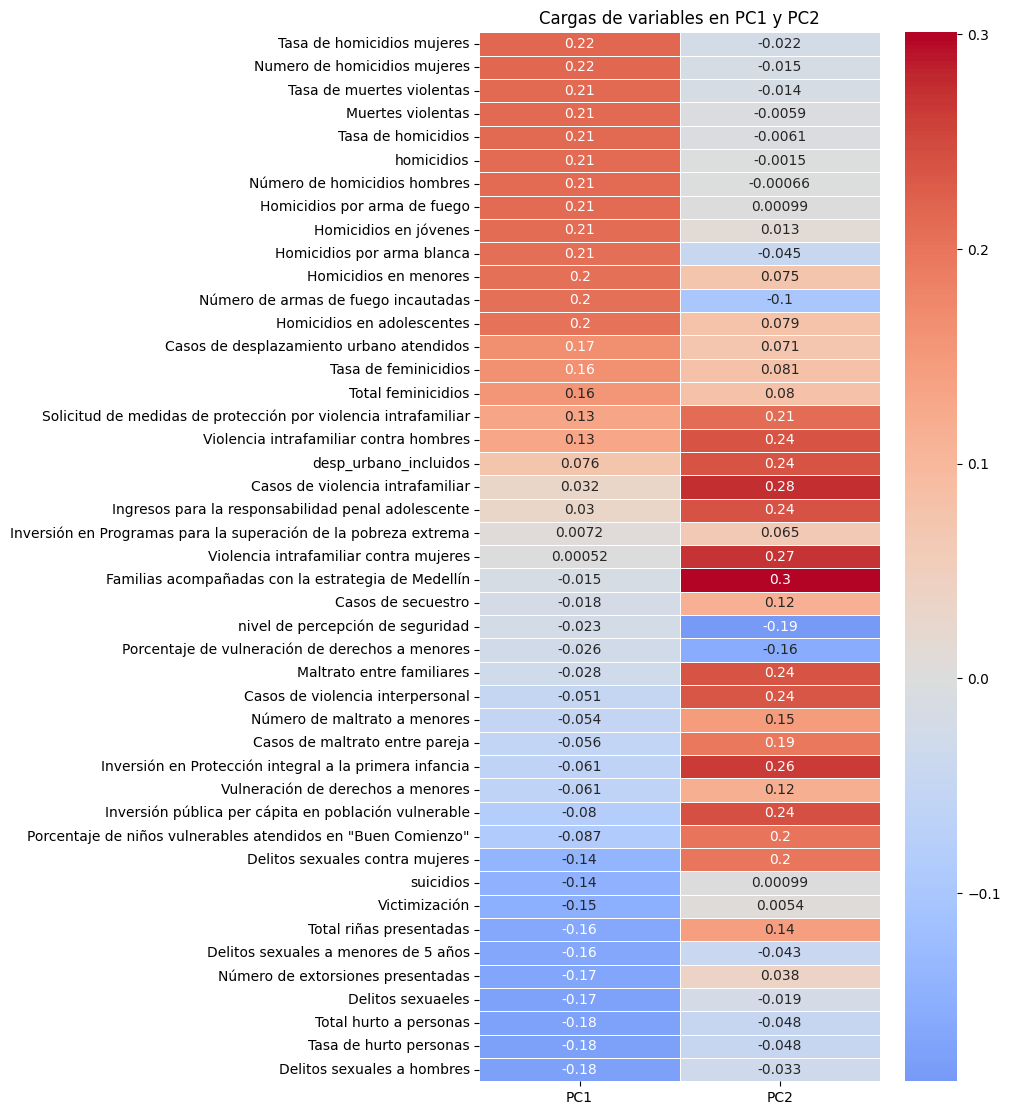

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Eliminar la variable de cámaras instaladas
dft = dft.drop(columns=[col for col in dft.columns if "cámaras" in col.lower()])

# 2. Añadir columna de años si no existe
if "año" not in dft.columns:
    dft["año"] = list(range(2008, 2008 + len(dft)))

# 3. Separar y preparar los datos numéricos
df_numerico = dft.drop(columns="año")

# 4. Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_numerico)

# 5. Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 6. Aplicar PCA (2 componentes)
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(X_scaled)

# 7. Crear DataFrame de componentes (cargas)
df_componentes = pd.DataFrame(pca.components_.T,
                              columns=["PC1", "PC2"],
                              index=df_numerico.columns)

# 8. Varianza explicada
var_exp = pca.explained_variance_ratio_ * 100
print(f"Varianza explicada por PC1: {var_exp[0]:.2f}%")
print(f"Varianza explicada por PC2: {var_exp[1]:.2f}%")

# 9. Gráfico de distribución de los años en el plano PC1 vs PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_resultado[:, 0], y=pca_resultado[:, 1])
for i, year in enumerate(dft["año"]):
    plt.text(pca_resultado[i, 0]+0.2, pca_resultado[i, 1]+0.2, str(year), fontsize=9)
plt.title("Distribución de los años en el espacio PCA")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% varianza)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% varianza)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Mostrar las variables que más contribuyen a PC1 y PC2
print("\nVariables más influyentes en PC1 (positivas):")
print(df_componentes.sort_values("PC1", ascending=False).head(10))

print("\nVariables más influyentes en PC2 (positivas):")
print(df_componentes.sort_values("PC2", ascending=False).head(10))

print("\nVariables más influyentes en PC2 (negativas):")
print(df_componentes.sort_values("PC2", ascending=True).head(10))

# 11. Heatmap de las cargas
plt.figure(figsize=(10, len(df_componentes) * 0.25))
sns.heatmap(df_componentes.sort_values("PC1", ascending=False),
            annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Cargas de variables en PC1 y PC2")
plt.tight_layout()
plt.show()




Segundo ejercicio de PCA enfocado únicamente en variables independientes


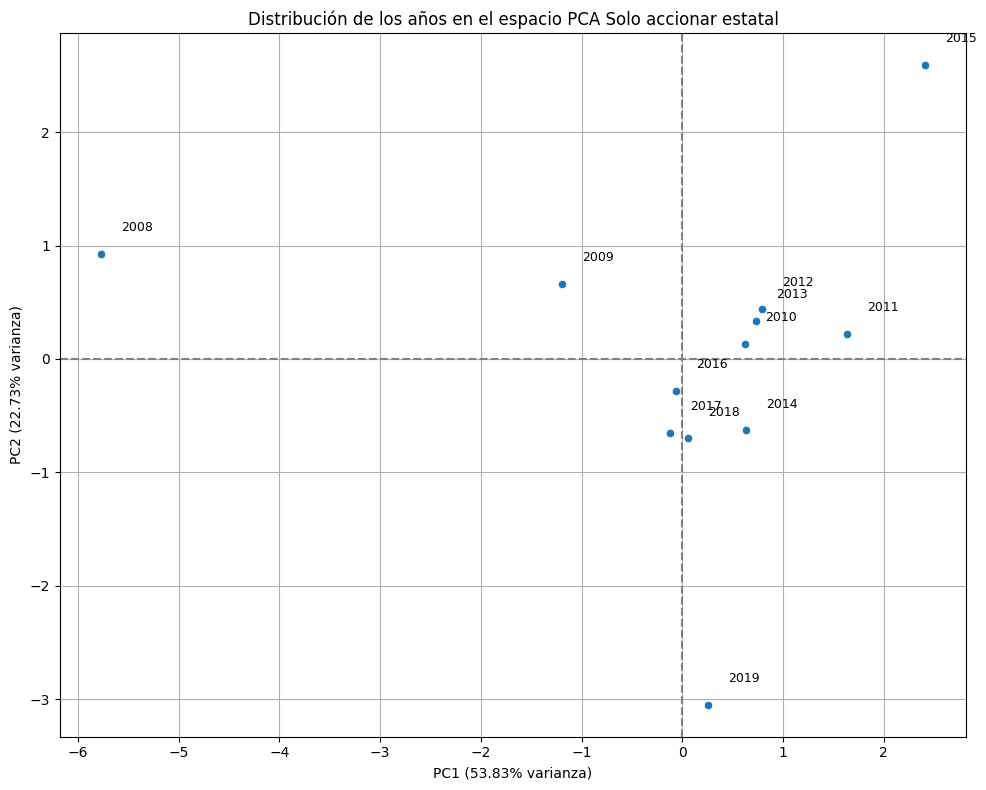

Principales variables que explican PC1:
                                                         PC1       PC2
Inversión pública per cápita en población vulne...  0.480620 -0.171804
Inversión en Protección integral a la primera i...  0.474841 -0.132119
Porcentaje de niños vulnerables atendidos en "B...  0.433600 -0.333345
Familias acompañadas con la estrategia de Medellín  0.416008  0.414406
Ingresos para la responsabilidad penal adolescente  0.376604  0.220769
Solicitud de medidas de protección por violenci...  0.197196  0.325921
Inversión en Programas para la superación de la... -0.041742  0.717783

Principales variables que explican PC2:
                                                         PC1       PC2
Inversión en Programas para la superación de la... -0.041742  0.717783
Familias acompañadas con la estrategia de Medellín  0.416008  0.414406
Solicitud de medidas de protección por violenci...  0.197196  0.325921
Ingresos para la responsabilidad penal adolescente  0.376604  0.220

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar variables del accionar estatal (excluyendo percepción)
variables_indep = [
    col for col in dft.columns
    if any(x in col.lower() for x in [
        "protección", "acompañadas", "estrategia de medellín", "pobreza",
        "inversión", "buen comienzo", "penal adolescente", "primera infancia"
    ]) and "percepción" not in col.lower()
]

# 2. Imputar y estandarizar
X_indep = dft[variables_indep]
imputer = SimpleImputer(strategy="mean")
X_imp = imputer.fit_transform(X_indep)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

# 3. PCA
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(X_scaled)
var_exp = pca.explained_variance_ratio_ * 100

# 4. Agregar resultados al DataFrame
dft["PC1_indep"] = pca_resultado[:, 0]
dft["PC2_indep"] = pca_resultado[:, 1]

# 5. Gráfico
plt.figure(figsize=(10, 8))
sns.scatterplot(x=dft["PC1_indep"], y=dft["PC2_indep"])
for i, year in enumerate(dft["año"]):
    plt.text(dft["PC1_indep"][i]+0.2, dft["PC2_indep"][i]+0.2, str(year), fontsize=9)
plt.title("Distribución de los años en el espacio PCA Solo accionar estatal")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% varianza)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% varianza)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Cargas de los componentes
componentes_df = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=X_indep.columns
)

# Mostrar principales contribuyentes
print("Principales variables que explican PC1:")
print(componentes_df.sort_values("PC1", ascending=False).head(10))

print("\nPrincipales variables que explican PC2:")
print(componentes_df.sort_values("PC2", ascending=False).head(10))


Análisis por clustering

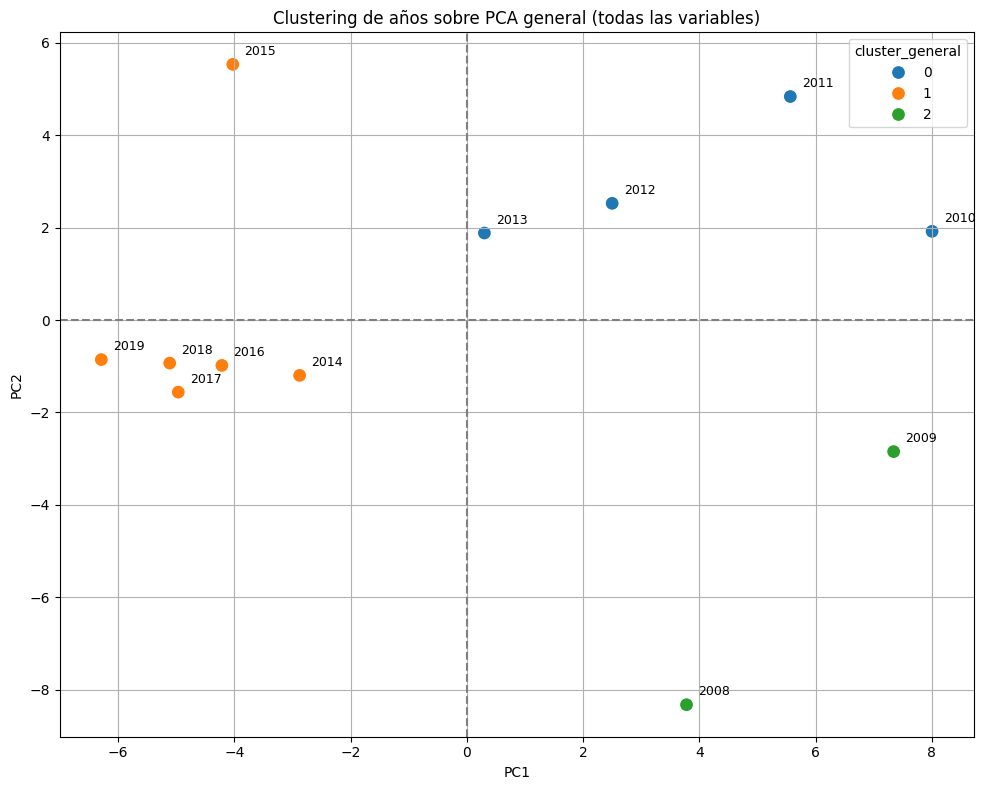

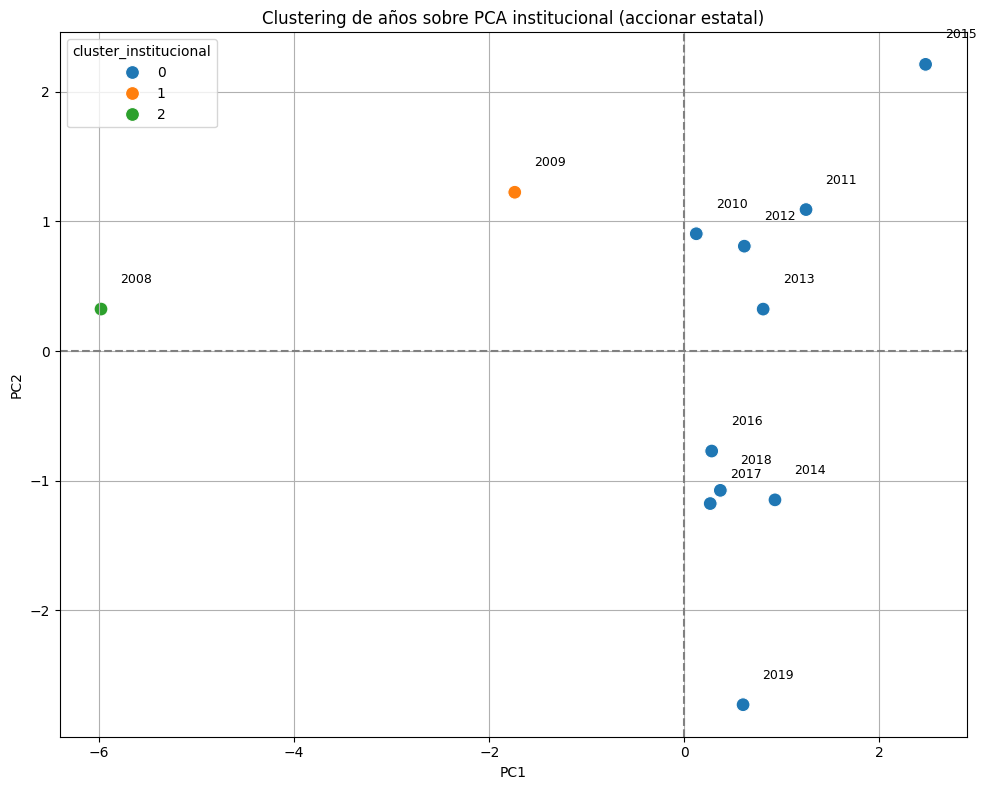

Clústeres PCA General: {0: [2010, 2011, 2012, 2013], 1: [2014, 2015, 2016, 2017, 2018, 2019], 2: [2008, 2009]}
Clústeres PCA Institucional: {0: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 1: [2009], 2: [2008]}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. PCA General (todas las variables)
X = dft.drop(columns="ano")
X_imp = SimpleImputer(strategy="mean").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imp)

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(X_scaled)
dft["PC1"] = pca_resultado[:, 0]
dft["PC2"] = pca_resultado[:, 1]

# Clustering sobre PCA general
kmeans_general = KMeans(n_clusters=3, random_state=42)
dft["cluster_general"] = kmeans_general.fit_predict(dft[["PC1", "PC2"]])

# 🔷 Gráfico de clústeres (PCA general)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dft, x="PC1", y="PC2", hue="cluster_general", palette="tab10", s=100)
for i in range(len(dft)):
    plt.text(dft["PC1"][i]+0.2, dft["PC2"][i]+0.2, str(dft["ano"][i]), fontsize=9)
plt.title("Clustering de años sobre PCA general (todas las variables)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. PCA Institucional (solo variables del accionar estatal)
variables_indep = [
    col for col in dft.columns if any(x in col.lower() for x in [
        "protección", "acompañadas", "estrategia de medellín", "pobreza",
        "inversión", "buen comienzo", "penal adolescente", "primera infancia", "incautadas"
    ])
]

X_indep = dft[variables_indep]
X_imp_indep = SimpleImputer(strategy="mean").fit_transform(X_indep)
X_scaled_indep = StandardScaler().fit_transform(X_imp_indep)

pca_indep = PCA(n_components=2)
pca_resultado_indep = pca_indep.fit_transform(X_scaled_indep)
dft["PC1_indep"] = pca_resultado_indep[:, 0]
dft["PC2_indep"] = pca_resultado_indep[:, 1]

# Clustering sobre PCA institucional
kmeans_institucional = KMeans(n_clusters=3, random_state=42)
dft["cluster_institucional"] = kmeans_institucional.fit_predict(dft[["PC1_indep", "PC2_indep"]])

# 🔷 Gráfico de clústeres (PCA institucional)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dft, x="PC1_indep", y="PC2_indep", hue="cluster_institucional", palette="tab10", s=100)
for i in range(len(dft)):
    plt.text(dft["PC1_indep"][i]+0.2, dft["PC2_indep"][i]+0.2, str(dft["ano"][i]), fontsize=9)
plt.title("Clustering de años sobre PCA institucional (accionar estatal)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear resumen de años por clúster para PCA general
general_clusters = dft.groupby("cluster_general")["ano"].apply(list).to_dict()

# Crear resumen de años por clúster para PCA institucional
institucional_clusters = dft.groupby("cluster_institucional")["ano"].apply(list).to_dict()

# Mostrar ambos resultados
print("Clústeres PCA General:", general_clusters)
print("Clústeres PCA Institucional:", institucional_clusters)



Resumen de las variables más influyentes del clustering general

In [ ]:
# Extraer las variables que usaste originalmente para el PCA general
X = dft.drop(columns=["año", "PC1", "PC2", "cluster_general",
                      "PC1_indep", "PC2_indep", "cluster_institucional"], errors="ignore")

# Imputación de valores faltantes y escalado
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

X_imp = SimpleImputer(strategy="mean").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imp)

# Aplicación de PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Cálculo de las cargas por componente
loadings = pca.components_.T * pca.explained_variance_ratio_

# DataFrame con nombres de variables y magnitud combinada
pca_loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2"])
pca_loadings_df["variable"] = X.columns
pca_loadings_df["magnitude"] = np.sqrt(pca_loadings_df["PC1"]**2 + pca_loadings_df["PC2"]**2)

# Ordenar por magnitud para identificar las más influyentes
top_variables = pca_loadings_df.sort_values(by="magnitude", ascending=False)

# Mostrar top 15 variables más influyentes
print(top_variables[["variable", "PC1", "PC2", "magnitude"]].head(15))



                               variable       PC1       PC2  magnitude
6            Tasa de homicidios mujeres  0.097905 -0.004474   0.098007
7          Numero de homicidios mujeres  0.097722 -0.003054   0.097769
9             Tasa de muertes violentas  0.096533 -0.002794   0.096573
10                    Muertes violentas  0.096283 -0.001177   0.096291
0                    Tasa de homicidios  0.096236 -0.001213   0.096243
1                            homicidios  0.095947 -0.000303   0.095948
8          Número de homicidios hombres  0.095522 -0.000131   0.095522
28         Homicidios por arma de fuego  0.095139  0.000197   0.095139
27           Homicidios por arma blanca  0.094258 -0.008911   0.094679
30                Homicidios en jóvenes  0.094589  0.002584   0.094624
26  Número de armas de fuego incautadas  0.091822 -0.020486   0.094080
31                Homicidios en menores  0.092037  0.015008   0.093253
29           Homicidios en adolescentes  0.091585  0.015666   0.092915
19    

#En esta nueva parte, se exponen los mismos ejercicios, esta ve, aplicando el proceso para reducir multicolinealidad. Para esta versión de la base de datos, también se excluyeron otras variables absolutas que no tienen peso sobre el análisis como: total población, total población homhres-mujeres-menores de 5 años.

**Imputación de valores faltantes**

In [ ]:
import pandas as pd

df = pd.read_excel("/content/variables seleccionadas.xlsx")

# Copia del DataFrame original para no modificarlo directamente
df_imputado = df.copy()

# Imputar solo columnas numéricas: llenar NaN con la media de cada columna
df_imputado = df_imputado.apply(
    lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col


**Para evitar multicolinealidad se convierten variables relacionadas en proporciones para evitar redundancia interna, lidiar con diferentes escalas de medición, permitir un análisis estructural que compare la composición interna y no solo la magnitud**

In [ ]:
df_proporciones = df_imputado.copy()

# Asegurar nombres en minúsculas y sin espacios
df_proporciones.columns = df_proporciones.columns.str.strip().str.lower().str.replace(" ", "_")

# Crear proporciones de homicidios
df_proporciones["prop_homicidios_mujeres"] = df_proporciones["numero_de_homicidios_mujeres"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_hombres"] = df_proporciones["número_de_homicidios_hombres"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_arma_fuego"] = df_proporciones["homicidios_por_arma_de_fuego"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_arma_blanca"] = df_proporciones["homicidios_por_arma_blanca"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_jóvenes"] = df_proporciones["homicidios_en_jóvenes"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_adolescentes"] = df_proporciones["homicidios_en_adolescentes"] / df_proporciones["homicidios"]
df_proporciones["prop_homicidios_menores"] = df_proporciones["homicidios_en_menores"] / df_proporciones["homicidios"]

# Crear proporciones de violencia intrafamiliar
df_proporciones["prop_violencia_mujeres"] = df_proporciones["violencia_intrafamiliar_contra_mujeres"] / df_proporciones["casos_de_violencia_intrafamiliar"]
df_proporciones["prop_violencia_hombres"] = df_proporciones["violencia_intrafamiliar_contra_hombres"] / df_proporciones["casos_de_violencia_intrafamiliar"]
df_proporciones["prop_violencia_pareja"] = df_proporciones["casos_de_maltrato_entre_pareja"] / df_proporciones["casos_de_violencia_intrafamiliar"]
df_proporciones["prop_violencia_familiares"] = df_proporciones["maltrato_entre_familiares"] / df_proporciones["casos_de_violencia_intrafamiliar"]

# Crear proporciones de delitos sexuales
df_proporciones["prop_delitos_mujeres"] = df_proporciones["delitos_sexuales_contra_mujeres"] / df_proporciones["delitos_sexuales"]
df_proporciones["prop_delitos_hombres"] = df_proporciones["delitos_sexuales_a_hombres"] / df_proporciones["delitos_sexuales"]
df_proporciones["prop_delitos_menores"] = df_proporciones["delitos_sexuales_a_menores_de_5_años"] / df_proporciones["delitos_sexuales"]

df_proporciones.head()

**Se eliminan variables absolutas para evitar redundancia**

In [ ]:
# Lista de columnas absolutas a eliminar
columnas_a_eliminar = [
    "homicidios",
    "delitos_sexuales",
    "casos_de_violencia_intrafamiliar",
    "numero_de_homicidios_mujeres",
    "número_de_homicidios_hombres",
    "homicidios_por_arma_de_fuego",
    "homicidios_por_arma_blanca",
    "violencia_intrafamiliar_contra_mujeres",
    "violencia_intrafamiliar_contra_hombres",
    "casos_de_maltrato_entre_pareja",
    "maltrato_entre_familiares",
    "delitos_sexuales_contra_mujeres",
    "delitos_sexuales_a_hombres",
    "delitos_sexuales_a_menores_de_5_años",
    "homicidios_en_jóvenes",
    "homicidios_en_adolescentes",
    "homicidios_en_menores",

]

# Eliminar las columnas del DataFrame
df_proporciones.drop(columns=columnas_a_eliminar, inplace=True, errors="ignore")

df_proporciones.head()

**Normalizar y escalar variables con Z-Score para llevar todas las variables numéricas a una misma escala o rango de valores.**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Seleccionar solo las columnas numéricas (excluyendo por ejemplo 'ano' si quieres mantenerla aparte)
columnas_numericas = df_proporciones.select_dtypes(include=['float64', 'int64']).columns.drop('ano', errors='ignore')

# Aplicar z-score
scaler = StandardScaler()
df_normalizado = df_proporciones.copy()
df_normalizado[columnas_numericas] = scaler.fit_transform(df_proporciones[columnas_numericas])

df_normalizado.head()

**Creación de mapa de calor luego del proceso**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar la columna 'ano' y columnas completamente vacías o redundantes
df_clean = df_normalizado.drop(columns=["ano", "número_de_cámaras_instaladas"])
df_clean = df_clean.loc[:, df_clean.notna().any()]  # Elimina columnas totalmente vacías


# Calcular la matriz de correlación
corr_matrix = df_clean.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.5})
plt.title("Mapa de calor de correlaciones entre variables")
plt.tight_layout()
plt.show()

**Ejercicio de random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Preparar datos y excluir variables no deseadas
X = df_normalizado.drop(columns="ano")

# Lista de variables a excluir
variables_a_excluir = [
    'solicitud_de_medidas_de_protección_por_violencia_intrafamiliar',
    'familias_acompañadas_con_la_estrategia_de_medellín',
    'inversión_en_programas_para_la_superación_de_la_pobreza_extrema',
    'inversión_pública_per_cápita_en_población_vulnerable',
    'porcentaje_de_niños_vulnerables_atendidos_en_"buen_comienzo"',
    'ingresos_para_la_responsabilidad_penal_adolescente',
    'nivel_de_percepción_de_seguridad',
    'inversión_en_protección_integral_a_la_primera_infancia'
]

X = X.drop(columns=variables_a_excluir, errors='ignore')  # `errors='ignore'` evita errores si alguna columna no existe

# 2. Imputar y escalar
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. Índice sintético
synthetic_index = X_scaled.mean(axis=1)
features = pd.DataFrame(X_imputed, columns=X.columns)

# 4. Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(features, synthetic_index)

# 5. Importancia de variables
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Variable': features.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# 6. Visualizar top 15
top_vars = importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_vars["Variable"], x=top_vars["Importancia"], palette="viridis")
plt.title("Importancia de variables según Random Forest (exploratorio)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# 7. Tabla completa
print("\nImportancia de variables según Random Forest (índice sintético):\n")
print(importance_df.to_string(index=False))


**Ejercicio de PCA**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Copiar base y eliminar columnas problemáticas
dft = df_normalizado.copy()
dft = dft.drop(columns=[col for col in dft.columns if "cámaras" in col.lower()], errors='ignore')
dft = dft.loc[:, ~(dft.columns.str.strip() == '')]  # eliminar columnas sin nombre
dft = dft.dropna(axis=1, how='all')  # eliminar columnas completamente vacías

# 2. Asegurar que la columna 'ano' existe
if "ano" not in dft.columns:
    dft["ano"] = list(range(2008, 2008 + len(dft)))

# 3. Imputar valores faltantes con la media
imputador = SimpleImputer(strategy="mean")
columnas_sin_ano = dft.drop(columns="ano").columns
df_numerico = pd.DataFrame(
    imputador.fit_transform(dft.drop(columns="ano")),
    columns=columnas_sin_ano
)

# 4. Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(df_numerico)

# 5. Crear DataFrame de cargas (componentes)
df_componentes = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df_numerico.columns
)

# 6. Varianza explicada
var_exp = pca.explained_variance_ratio_ * 100
print(f"Varianza explicada por PC1: {var_exp[0]:.2f}%")
print(f"Varianza explicada por PC2: {var_exp[1]:.2f}%")

# 7. Gráfico de dispersión de los años en el espacio PC1-PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_resultado[:, 0], y=pca_resultado[:, 1])
for i, year in enumerate(dft["ano"]):
    plt.text(pca_resultado[i, 0] + 0.2, pca_resultado[i, 1] + 0.2, str(year), fontsize=9)
plt.title("Ejercicio de PCA luego de proceso de disminución de multicolinealidad")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% varianza)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% varianza)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Variables más influyentes en los componentes
print("\nVariables más influyentes en PC1 (positivas):")
print(df_componentes.sort_values("PC1", ascending=False).head(10))

print("\nVariables más influyentes en PC2 (positivas):")
print(df_componentes.sort_values("PC2", ascending=False).head(10))

print("\nVariables más influyentes en PC2 (negativas):")
print(df_componentes.sort_values("PC2", ascending=True).head(10))

# 9. Mapa de calor de cargas
plt.figure(figsize=(10, len(df_componentes) * 0.25))
sns.heatmap(
    df_componentes.sort_values("PC1", ascending=False),
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Cargas de variables en PC1 y PC2")
plt.tight_layout()
plt.show()

**Ejercicio de clustering**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Usamos la base ya trabajada
df_cluster = dft.copy()

# 1. PCA general (todas las variables numéricas excepto 'ano')
X = df_cluster.drop(columns="ano")
X_imp = SimpleImputer(strategy="mean").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imp)

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(X_scaled)
df_cluster["PC1"] = pca_resultado[:, 0]
df_cluster["PC2"] = pca_resultado[:, 1]

# Clustering general sobre el plano PCA
kmeans_general = KMeans(n_clusters=3, random_state=42)
df_cluster["cluster_general"] = kmeans_general.fit_predict(df_cluster[["PC1", "PC2"]])

# 🔷 Gráfico de clústeres generales
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cluster, x="PC1", y="PC2", hue="cluster_general", palette="tab10", s=100)
for i in range(len(df_cluster)):
    plt.text(df_cluster["PC1"][i]+0.2, df_cluster["PC2"][i]+0.2, str(df_cluster["ano"][i]), fontsize=9)
plt.title("Clustering de años sobre PCA general (todas las variables) luego de  proceso para limitar multicolinealidad")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. PCA institucional (solo variables del accionar estatal)
palabras_estado = [
        "protección", "acompañadas", "estrategia de medellín", "pobreza",
        "inversión", "buen comienzo", "penal adolescente", "primera infancia", "incautadas"
]

variables_indep = [
    col for col in df_cluster.columns
    if any(p in col.lower() for p in palabras_estado) and "percepción" not in col.lower()
]

X_indep = df_cluster[variables_indep]
X_imp_indep = SimpleImputer(strategy="mean").fit_transform(X_indep)
X_scaled_indep = StandardScaler().fit_transform(X_imp_indep)

pca_indep = PCA(n_components=2)
pca_resultado_indep = pca_indep.fit_transform(X_scaled_indep)
df_cluster["PC1_indep"] = pca_resultado_indep[:, 0]
df_cluster["PC2_indep"] = pca_resultado_indep[:, 1]

# Clustering institucional
kmeans_institucional = KMeans(n_clusters=3, random_state=42)
df_cluster["cluster_institucional"] = kmeans_institucional.fit_predict(df_cluster[["PC1_indep", "PC2_indep"]])

# 🔷 Gráfico de clústeres institucionales
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cluster, x="PC1_indep", y="PC2_indep", hue="cluster_institucional", palette="tab10", s=100)
for i in range(len(df_cluster)):
    plt.text(df_cluster["PC1_indep"][i]+0.2, df_cluster["PC2_indep"][i]+0.2, str(df_cluster["ano"][i]), fontsize=9)
plt.title("Clustering de años sobre PCA institucional (accionar estatal) luego de  proceso para limitar multicolinealidad")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Resumen de años por clúster
general_clusters = df_cluster.groupby("cluster_general")["ano"].apply(list).to_dict()
institucional_clusters = df_cluster.groupby("cluster_institucional")["ano"].apply(list).to_dict()

# Mostrar resultados
print("Clústeres PCA General:", general_clusters)
print("Clústeres PCA Institucional:", institucional_clusters)